Capacidad del canal es: 1.176 Mb/s

Â¡Â¡Â¡El canal estÃ¡ saturado!!!

Capacidad del canal es: 1.176 Mb/s

Â¡Â¡Â¡El canal estÃ¡ saturado!!!



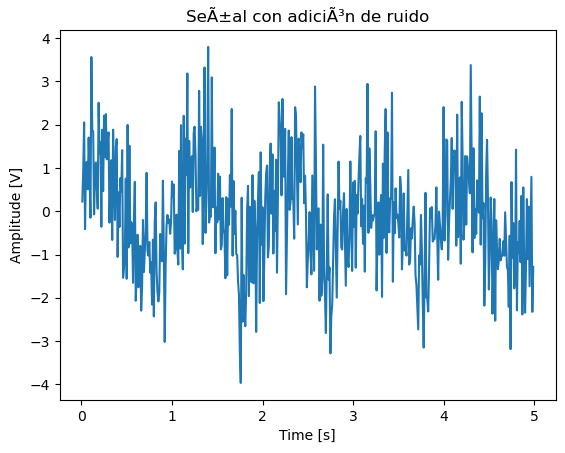

El dato enviado por el transmisor es  [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0]


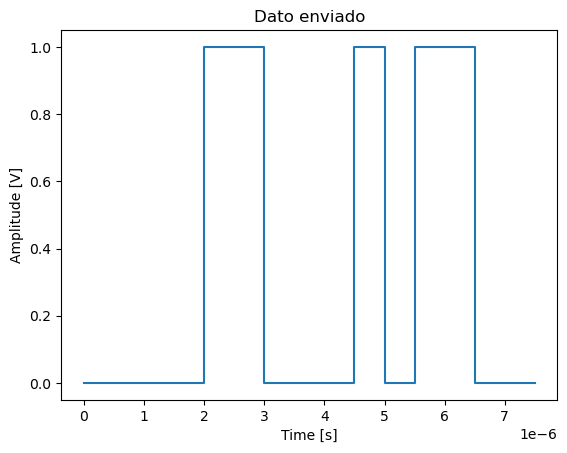

El dato que llega al receptor cuando hay ruido es  [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1]


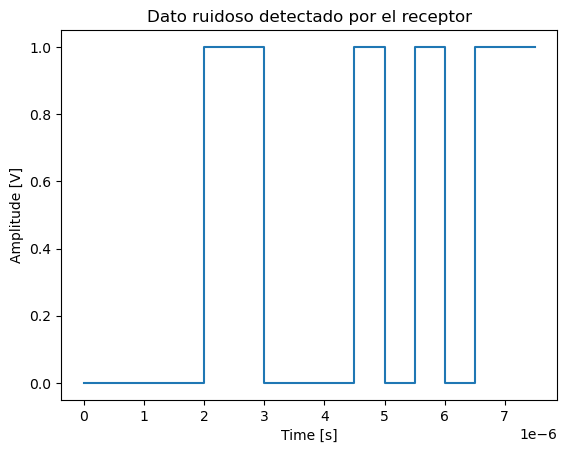

In [1]:
import random
import numpy as np
import io, os, sys, types
from ipynb.fs.full.Bloque_CanalAWGN import EjecucionCanal
from ipynb.fs.full.Bloque_CanalAWGN import ConvDec
import pandas as pd

DETECCION DE ERRORES

In [2]:
def deteccion_errores(dato_recibido, dato_enviado):
    vector_errores = []
    dato_corregido = []
    errores = 0
    for x in range (len(dato_recibido)):
        xor = int(dato_enviado[x]) ^ int(dato_recibido[x])             #deteccion de errores
        vector_errores.append(xor)
        if (xor == 1):                                                 #correcion de errores
            errores = errores + 1
            if int(dato_recibido[x]) == 0:
                dato_corregido.append('1')

            elif int(dato_recibido[x]) == 1:
                dato_corregido.append('0')
        else: 
            dato_corregido.append(dato_recibido[x])
    return [vector_errores, dato_corregido, errores]
    

CALCULO DEL BER

In [3]:
def BER(vector_errores,errores):
    N = (len(vector_errores))
    ber = errores / N
    return ber

DECODIFICACION

In [4]:
def decoder(dato_corregido):
    BPM = 0
    if(len(dato_corregido)==7):
        bits_mensaje = dato_corregido[0:4]
        bits_paridad = dato_corregido[5:7]
        bits_mensaje_str = ''.join(str(x) for x in bits_mensaje)
        x = int(bits_mensaje_str,2)
        if (x==0):
            BPM = random.randint(0, 80) # valores menores a 80 mapean a 0
        elif (x==1):
            BPM = random.randint(80, 90) # valores entre 80 y 90 mapean a 1
        elif (x==2):
            BPM = random.randint(90, 100) # valores entre 90 y 100 mapean a 2
        elif (x==3):
            BPM = random.randint(100, 110) # valores entre 100 y 110 mapean a 3 
        elif (x==4):
            BPM = random.randint(110, 120) # valores entre 110 y 120 mapean a 4
        elif (x==5):
            BPM = random.randint(120, 130) # valores entre 120 y 130 mepean a 5
        elif (x==6):
            BPM = random.randint(130, 140) # valores entre 130 y 140 mapean a 6
        elif (x==7):
            BPM = random.randint(140, 150) # valores entre 140 y 150 mapean a 7
        elif (x==8):
            BPM = random.randint(150, 160) # valores entre 150 y 160 mapean a 8
        elif (x==9):
            BPM = random.randint(160, 170) # valores entre 160 y 170 mapean a 9
        elif (x==10):
            BPM = random.randint(170, 200) # valores mayores a 170 mapean a 10

    elif(len(dato_corregido)==15):
        bits_mensaje = dato_corregido[0:11]
        bits_paridad = dato_corregido[12:15]
        bits_mensaje_str = ''.join(str(x) for x in bits_mensaje)
        BPM = int(bits_mensaje_str,2)
        
    return BPM

In [5]:
with open('data15.txt') as f:
    file_señales_enviadas = f.readlines()
    
with open('Ruidoso.txt') as f:
    file_señales_recibidas = f.readlines()

file_vector_errores = open("VectorErrores.txt", "w") #Creación del archivo txt
file_BER = open("BER.txt", "w") #Creación del archivo txt
file_BPM = open("BPM.txt", "w") #Creación del archivo txt
    
for x in range (len(file_señales_recibidas)):
    if (x == 0):
        continue
    else:
        dato_enviado = file_señales_enviadas[x].split()
        dato_recibido = file_señales_recibidas[x].split()    

        #dato_enviado = ['0','0','0','0','1','1','1','1','0','1','0','0','1','1','1'] #prueba ['1','0','0','0','0','1','0']
        #dato_recibido = ['0','0','0','1','1','1','1','1','0','1','0','0','1','1','1'] #prueba ['1','1','0','0','0','1','0']

        print("Señal Enviada:", dato_enviado)
        print("Señal Recibida:", dato_recibido,"\n")

        #deteccion de errores
        resultado = deteccion_errores(dato_recibido, dato_enviado)

        errores = resultado[2]
        dato_corregido = resultado[1]
        vector_errores = resultado [0] 

        if errores != 0:
            print("Error detectado. Dato corregido:", dato_corregido)
        else:
            print("No se detectaron errores. Dato:", dato_corregido)

        print("Vector de Error:", vector_errores,"\n")
        vector_errores_str = ''.join(str(x) for x in vector_errores)
        with open("VectorError.txt","a") as f:
            np.savetxt(f, [vector_errores_str], delimiter=" ", fmt="%s") #Guarda los datos procesados en el txt      

        #calculo de BER
        ber = BER(vector_errores,errores)
        print(errores, "errores detectados.\n", "BER:", ber,"\n")
        with open("BER.txt","a") as f:             
                np.savetxt(f, [ber], fmt='%1.9f', delimiter=' ') #Guarda los datos procesados en el txt

        #decodificacion
        dato_BPM = decoder(dato_corregido)
        print("Valor decodificado de BPM: ", dato_BPM,"\n","----------------------------------------------------------------------","\n")
        with open("BPM.txt","a") as f:             #Guarda los datos procesados en el txt
            np.savetxt(f, [dato_BPM], fmt='%1.0f', delimiter=' ')

Señal Enviada: ['0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1']
Señal Recibida: ['0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1'] 

Error detectado. Dato corregido: ['0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1']
Vector de Error: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0] 

2 errores detectados.
 BER: 0.13333333333333333 

Valor decodificado de BPM:  86 
 ---------------------------------------------------------------------- 

Señal Enviada: ['0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1']
Señal Recibida: ['0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0'] 

Error detectado. Dato corregido: ['0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1']
Vector de Error: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1] 

3 errores detectados.
 BER: 0.2 

Valor decodificado de BPM:  86 
 -----------------------------------------------------------

In [6]:
def BER_RANGE(SNRmin,SNRmax,archivo):
    BERlist=[]
    SNRlist=[]
    k=0
    for SNRi in range(SNRmin,SNRmax):
            getbinary = lambda x, n: format(x, 'b').zfill(n)    #transforma el nivel de cuantización a binario 
            with open(archivo, "r") as f:
                    data = f.readlines()
            Datos_Codificados=ConvDec(data)
            BERtotal=0
            BERprom=0
            RuidoAñadido=EjecucionCanal(Datos_Codificados,SNRi)     ##Pasa los datos codificados por el canal AWGN
            with open("Ruidoso.txt", "r") as f:
                Ruidoso = f.readlines()
                
            RuidoVar=int(data[0])
            if(RuidoVar==7):
                k=7
            if(RuidoVar==15):
                k=15
            for x in range (len(Ruidoso)):
                if (x == 0):
                    continue
                else:
                    dato_enviado = data[x].split()
                    dato_recibido = Ruidoso[x].split()
                    resultado = deteccion_errores(dato_recibido, dato_enviado)
                    errores = resultado[2]
                    dato_corregido = resultado[1]
                    vector_errores = resultado [0] 
                    ber = BER(vector_errores,errores)
                    BERtotal=BERtotal+ber
                    
            BERprom=BERtotal/254
            BERlist.append(BERprom)
            SNRlist.append(SNRi)
            print(BERlist)
       
    if(k==7):  
        DatosFinalesSNR={'SNR':SNRlist,'BER':BERlist}
        direc=os.getcwd()+'\\SNR74.xlsx'
        writer=pd.ExcelWriter(direc)
        DataframeDatos = pd.DataFrame(DatosFinalesSNR)
        DataframeDatos.to_excel(writer,sheet_name="SNR74",index=None)
        writer.save()
        
    if(k==15):
        DatosFinalesSNR={'SNR':SNRlist,'BER':BERlist}
        direc=os.getcwd()+'\\SNR1511.xlsx'
        writer=pd.ExcelWriter(direc)
        DataframeDatos = pd.DataFrame(DatosFinalesSNR)
        DataframeDatos.to_excel(writer,sheet_name="SNR1511",index=None)
        writer.save()    
            


In [7]:
archivo="data15.txt"

BER_RANGE(-10,25,archivo)

Capacidad del canal es: 0.138 Mb/s

Â¡Â¡Â¡El canal estÃ¡ saturado!!!

[0.07165354330708655]
Capacidad del canal es: 0.171 Mb/s

Â¡Â¡Â¡El canal estÃ¡ saturado!!!

[0.07165354330708655, 0.07165354330708658]
Capacidad del canal es: 0.212 Mb/s

Â¡Â¡Â¡El canal estÃ¡ saturado!!!

[0.07165354330708655, 0.07165354330708658, 0.06456692913385825]
Capacidad del canal es: 0.262 Mb/s

Â¡Â¡Â¡El canal estÃ¡ saturado!!!

[0.07165354330708655, 0.07165354330708658, 0.06456692913385825, 0.06141732283464566]
Capacidad del canal es: 0.323 Mb/s

Â¡Â¡Â¡El canal estÃ¡ saturado!!!

[0.07165354330708655, 0.07165354330708658, 0.06456692913385825, 0.06141732283464566, 0.06167979002624671]
Capacidad del canal es: 0.396 Mb/s

Â¡Â¡Â¡El canal estÃ¡ saturado!!!

[0.07165354330708655, 0.07165354330708658, 0.06456692913385825, 0.06141732283464566, 0.06167979002624671, 0.060104986876640405]
Capacidad del canal es: 0.483 Mb/s

Â¡Â¡Â¡El canal estÃ¡ saturado!!!

[0.07165354330708655, 0.07165354330708658, 0.06456692913385825

[0.07165354330708655, 0.07165354330708658, 0.06456692913385825, 0.06141732283464566, 0.06167979002624671, 0.060104986876640405, 0.051706036745406796, 0.06220472440944881, 0.0490813648293963, 0.049868766404199454, 0.055643044619422564, 0.054593175853018365, 0.04330708661417322, 0.04173228346456692, 0.03910761154855643, 0.03595800524934384, 0.032808398950131226, 0.025196850393700784, 0.02939632545931759, 0.017585301837270344, 0.019422572178477693, 0.010761154855643046, 0.006561679790026246, 0.010498687664041996, 0.001574803149606299]
Capacidad del canal es: 5.028 Mb/s

La tasa de transferencia no satura el canal

[0.07165354330708655, 0.07165354330708658, 0.06456692913385825, 0.06141732283464566, 0.06167979002624671, 0.060104986876640405, 0.051706036745406796, 0.06220472440944881, 0.0490813648293963, 0.049868766404199454, 0.055643044619422564, 0.054593175853018365, 0.04330708661417322, 0.04173228346456692, 0.03910761154855643, 0.03595800524934384, 0.032808398950131226, 0.0251968503937007

C:\Users\DIEGO\AppData\Local\Temp\ipykernel_5028\1069530434.py:53: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
